In [2]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, ElasticNet
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, accuracy_score, precision_score, f1_score, mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

np.random.seed(42)

import time
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Group 2:

Names of Group members:
Chukwuma Frank Chukwuemeka;
Mutthu Annamalai;
Supratim Basu. 

In [3]:
EnergyData = pd.read_csv('energydata_complete.csv')

In [5]:
#Data Preprocessing
def myPreProc(EnergyData):
    procData = EnergyData.dropna(how = 'all', axis = 1, inplace = False)
    procData = procData.dropna() 
    procData['Power'] = procData['Appliances'].astype(int) + procData['lights'].astype(int)
    procData = procData.drop('Appliances', axis = 1);
    procData = procData.drop('lights', axis = 1);
    procData = procData.drop('date', axis = 1);
    procData = procData.drop(['rv1', 'rv2'],axis=1)
    return procData

In [6]:
procData = myPreProc(EnergyData)

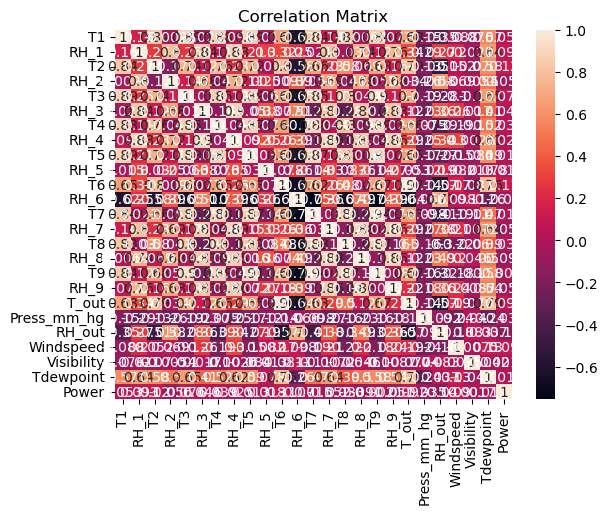

In [ ]:
# Plot a correlation matrix
corr = procData.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
X = procData.drop('Power', axis=1)
y = procData['Power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

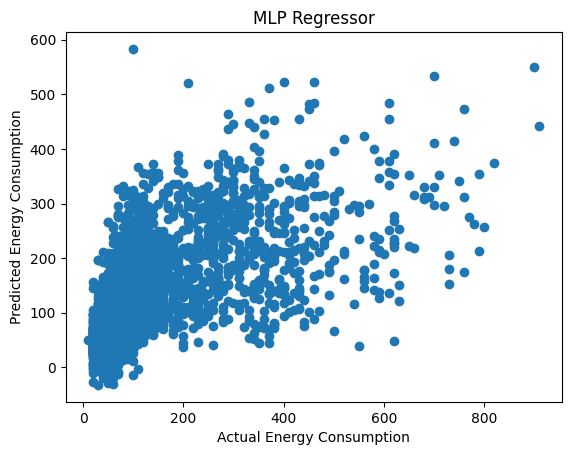

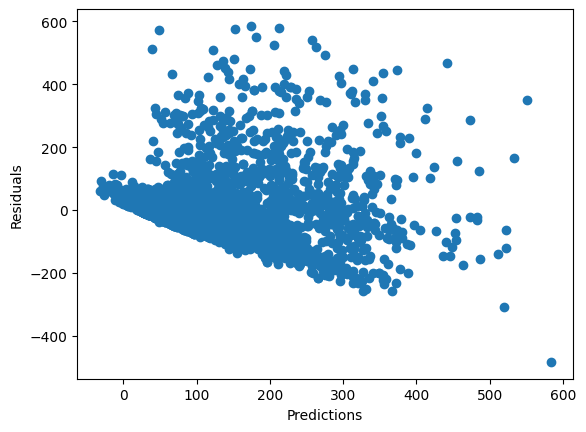

MSE: 6149.08
RMSE: 78.42
MAE: 45.15
Test R2 score is: 0.42
Execution time is: 121013.30


In [11]:
#Mult-Layer Perception Regression Model

#Standardizing the input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the MLP model
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50), 
    activation='relu', 
    solver='adam', 
    max_iter=1000,
    random_state=42
)

start_time_1 = time.time()
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

end_time_1 = time.time()
execution_time1 = (end_time_1 - start_time_1) * 1000

# Evaluate the model
r_2_ = r2_score(y_test, y_pred_mlp)
mse_2 = mean_squared_error(y_test,y_pred_mlp)
rmse_2 = np.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred_mlp)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred_mlp)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('MLP Regressor')
plt.show()


# Plot the residuals
plt.scatter(y_pred_mlp, y_test - y_pred_mlp)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()


print("MSE: {:.2f}" .format(mse_2))
print("RMSE: {:.2f}" .format(rmse_2))
print("MAE: {:.2f}" .format(mae_2))
print('Test R2 score is: {:.2f}' .format(r_2_))
print('Execution time is: {:.2f}' .format(execution_time1))






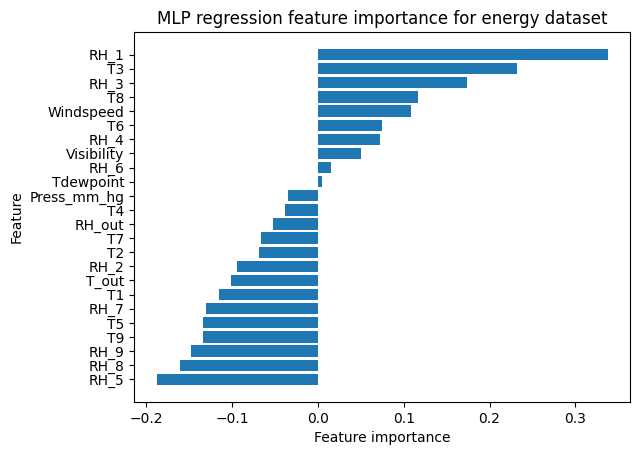

In [60]:
# Obtain the feature importance scores from the trained MLP model
importance_scores = mlp.coefs_[0].mean(axis=1)

# Get the feature names
feature_names = X_train.columns.tolist()

# Sort the features by importance scores in ascending order
sorted_idx = importance_scores.argsort()
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_importance_scores = importance_scores[sorted_idx]

# Visualize the feature importance using a horizontal bar plot
plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("MLP regression feature importance for energy dataset")
plt.show()


In [61]:
MLP_procData = procData.drop(['RH_5', 'RH_8', 'RH_9'],axis=1)

In [62]:
X1 = MLP_procData.drop('Power', axis=1)
y1 = MLP_procData['Power']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [63]:
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


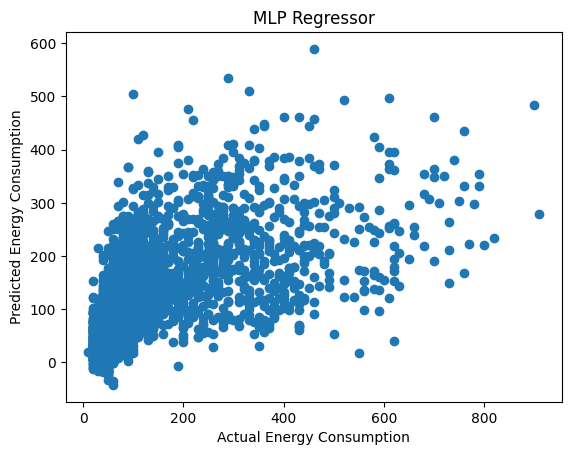

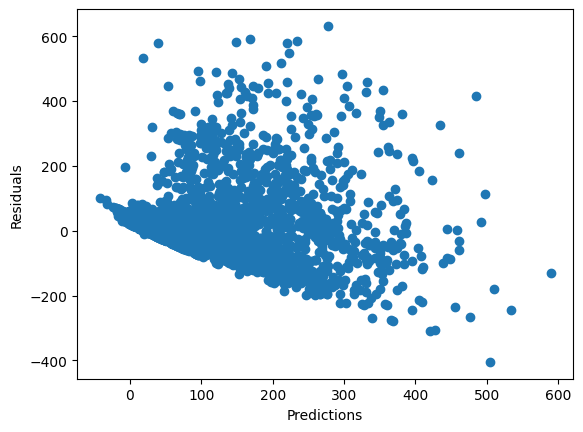

MSE: 6415.48
RMSE: 80.10
MAE: 45.12
Test R2 score is: 0.40
Execution time is: 94723.13


In [64]:
# Train the MLP model
mlp1 = MLPRegressor(
    hidden_layer_sizes=(100, 50), 
    activation='relu', 
    solver='adam', 
    max_iter=1000,
    random_state=42
)

start1_time_1 = time.time()
mlp1.fit(X1_train_scaled, y1_train)
y1_pred_mlp = mlp1.predict(X1_test_scaled)

end1_time_1 = time.time()
execution1_time1 = (end1_time_1 - start1_time_1) * 1000

# Evaluate the model
r1_2_ = r2_score(y1_test, y1_pred_mlp)
mse1_2 = mean_squared_error(y1_test,y1_pred_mlp)
rmse1_2 = np.sqrt(mse1_2)
mae1_2 = mean_absolute_error(y1_test, y1_pred_mlp)

# Plot the predicted values vs. the true values
plt.scatter(y1_test, y1_pred_mlp)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('MLP Regressor')
plt.show()


# Plot the residuals
plt.scatter(y1_pred_mlp, y1_test - y1_pred_mlp)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()


print("MSE: {:.2f}" .format(mse1_2))
print("RMSE: {:.2f}" .format(rmse1_2))
print("MAE: {:.2f}" .format(mae1_2))
print('Test R2 score is: {:.2f}' .format(r1_2_))
print('Execution time is: {:.2f}' .format(execution1_time1))


As can be seen there is no improvement on the model after the feature importance selection optimization. Instead, the performance decreased since the error metric became larger. This is an indication that feature selcetion is not the optimal tuning that is necessary to improve the performance of this model. hemce, we will check using GridgeSearchCV in the next code.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

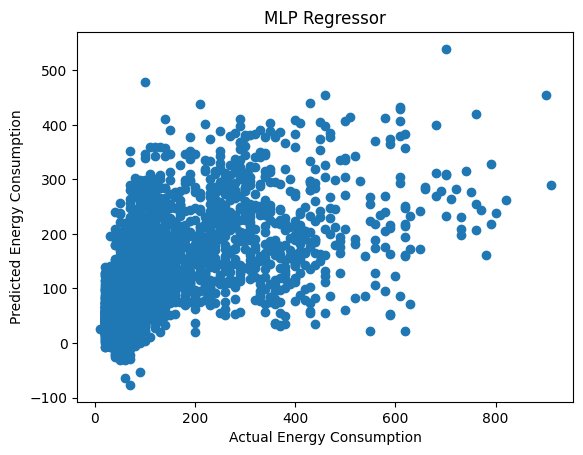

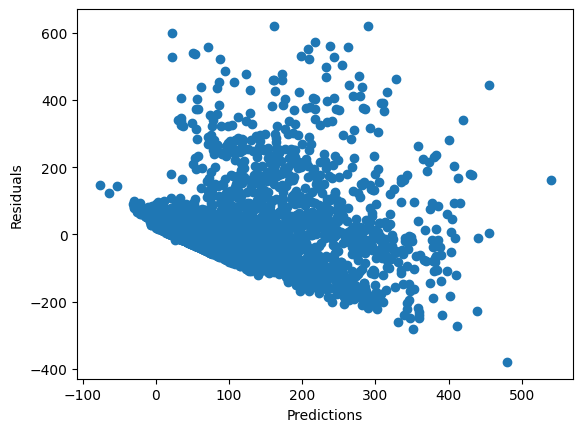

Best parameters:  {'activation': 'relu', 'hidden_layer_sizes': (150,), 'solver': 'lbfgs'}
MSE: 6780.15
RMSE: 78.42
MAE: 47.76
Test R2 score is: 0.37
Execution time is: 12.85


In [57]:
# Define the parameter grid for hyperparameter tuning
param_grid1 = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'sigmoid'],
    'solver': ['adam', 'lbfgs']
}

# Train the MLP model with hyperparameter tuning
mlp2 = MLPRegressor(random_state=42)
grid_search_mlp = GridSearchCV(mlp2, param_grid1, cv=5)
start2_time = time.time()
grid_search_mlp.fit(X_train_scaled, y_train)
end2_time = time.time()

# Select the best model
best_mlp2 = grid_search_mlp.best_estimator_

# Predict using the best model
start2_time_1 = time.time()
y_pred_mlp2 = best_mlp2.predict(X_test_scaled)
end2_time_1 = time.time()
execution2_time1 = (end2_time_1 - start2_time_1) * 1000

# Evaluate the model
r2_2_ = r2_score(y_test, y_pred_mlp2)
mse2_2 = mean_squared_error(y_test, y_pred_mlp2)
rmse2_2 = np.sqrt(mse_2)
mae2_2 = mean_absolute_error(y_test, y_pred_mlp2)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred_mlp2)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('MLP Regressor')
plt.show()

# Plot the residuals
plt.scatter(y_pred_mlp2, y_test - y_pred_mlp2)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

# Print the results
print("Best parameters: ", grid_search_mlp.best_params_)
print("MSE: {:.2f}" .format(mse2_2))
print("RMSE: {:.2f}" .format(rmse2_2))
print("MAE: {:.2f}" .format(mae2_2))
print('Test R2 score is: {:.2f}' .format(r2_2_))
print('Execution time is: {:.2f}' .format(execution2_time1))

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

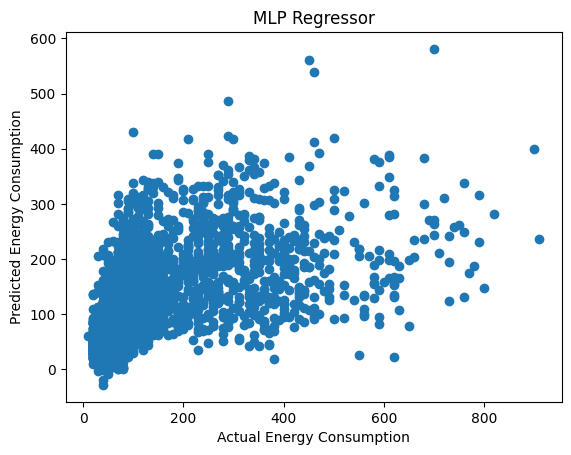

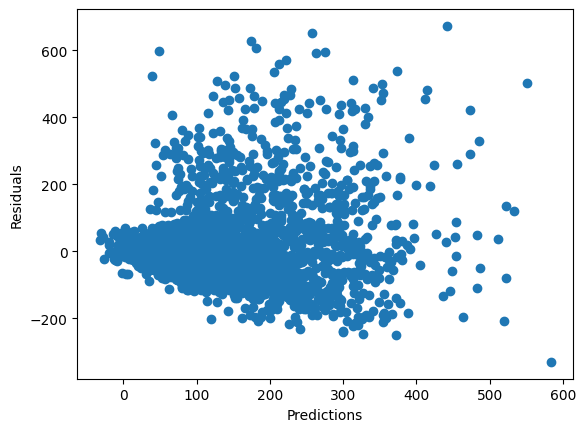

MSE: 6931.40
RMSE: 78.42
MAE: 45.10
Test R2 score is: 0.35


In [ ]:

# Create a pipeline that includes PCA and the MLPRegressor model
pipeline = make_pipeline(
    PCA(),
    MLPRegressor(random_state=42)
)

# Define a grid of hyperparameters to search over in the GridSearchCV
param_grid1_mlp = {
    'pca__n_components': [5, 10, 20],
    'mlpregressor__hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'mlpregressor__activation': ['relu', 'sigmoid'],
    'mlpregressor__solver': ['adam', 'sgd']
}

# Fit the GridSearchCV object on the training data
grid = GridSearchCV(pipeline, param_grid1_mlp, cv=5)
grid.fit(X_train_scaled, y_train)

# Use the best estimator from the GridSearchCV to make predictions on the test data
y_pred_mlp3 = grid.best_estimator_.predict(X_test_scaled)

# Evaluate the model
r3_2_ = r2_score(y_test, y_pred_mlp3)
mse3_2 = mean_squared_error(y_test, y_pred_mlp3)
rmse3_2 = np.sqrt(mse_2)
mae3_2 = mean_absolute_error(y_test, y_pred_mlp3)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred_mlp3)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('MLP Regressor')
plt.show()

# Plot the residuals
plt.scatter(y_pred_mlp, y_test - y_pred_mlp3)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

print("MSE: {:.2f}" .format(mse3_2))
print("RMSE: {:.2f}" .format(rmse3_2))
print("MAE: {:.2f}" .format(mae3_2))
print('Test R2 score is: {:.2f}' .format(r3_2_))

Combining PCA which helps to reduce the dimensionality of a model, with the MLP regressor still did not improve the performance of the model. Hence we are resorting to using a RandomizedSearch to see if we can have an improvement.

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

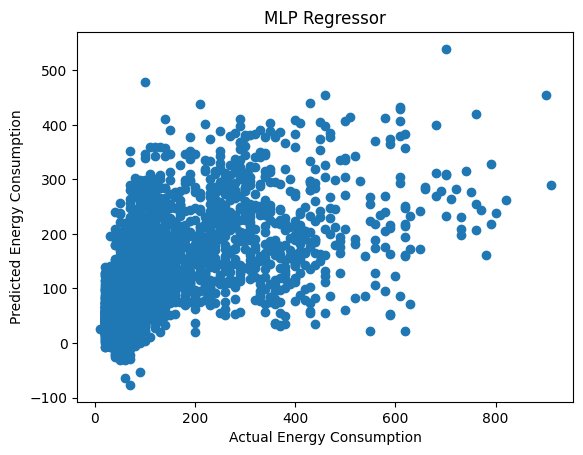

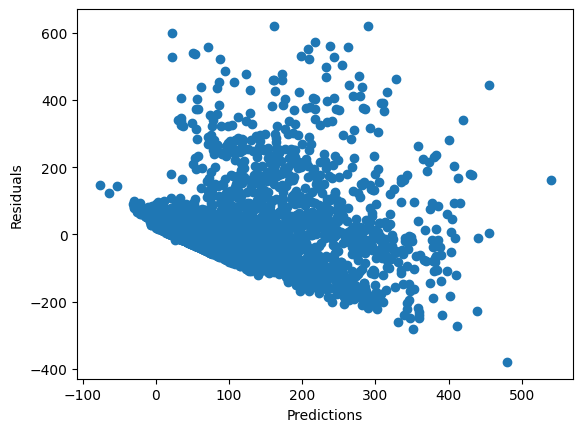

Best parameters:  {'solver': 'lbfgs', 'hidden_layer_sizes': (150,), 'activation': 'relu'}
MSE: 6780.15
RMSE: 82.34
MAE: 47.76
Test R2 score is: 0.37
Execution time is: 374869.42


In [67]:
# Define the parameter grid for hyperparameter tuning
param_grid6 = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'sigmoid'],
    'solver': ['adam', 'lbfgs']
}

# Train the MLP model with hyperparameter tuning using RandomizedSearchCV
mlp6 = MLPRegressor(random_state=42)
random_search_mlp6 = RandomizedSearchCV(mlp6, param_distributions=param_grid6, n_iter=10, cv=5, random_state=42)
start2_time_1_6 = time.time()
random_search_mlp6.fit(X_train_scaled, y_train)


# Select the best model
best_mlp6 = random_search_mlp6.best_estimator_

# Predict using the best model

y_pred_mlp2_6 = best_mlp6.predict(X_test_scaled)
end2_time_1_6 = time.time()
execution2_time1_6 = (end2_time_1_6 - start2_time_1_6) * 1000

# Evaluate the model
r2_2_6 = r2_score(y_test, y_pred_mlp2_6)
mse2_2_6 = mean_squared_error(y_test, y_pred_mlp2_6)
rmse2_2_6 = np.sqrt(mse2_2_6)
mae2_2_6 = mean_absolute_error(y_test, y_pred_mlp2_6)

# Plot the predicted values vs. the true values
plt.scatter(y_test, y_pred_mlp2_6)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title('MLP Regressor')
plt.show()

# Plot the residuals
plt.scatter(y_pred_mlp2_6, y_test - y_pred_mlp2_6)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()

# Print the results
print("Best parameters: ", random_search_mlp6.best_params_)
print("MSE: {:.2f}" .format(mse2_2_6))
print("RMSE: {:.2f}" .format(rmse2_2_6))
print("MAE: {:.2f}" .format(mae2_2_6))
print('Test R2 score is: {:.2f}' .format(r2_2_6))
print('Execution time is: {:.2f}' .format(execution2_time1_6))

Even after employing a RandomizedSearchCV method, the model refused to improve or respond positively to our tuning. Hence,the hyperparameters may not be the bottleneck for the performance of the model, and other factors or maybe the taining data maybe insufficiuent to cause the model to adjust postively to the several changes we have made in tuning it. However, we were not too discoraged by this result as even when hyperparameter tuning was not able to adjust a model positiviely, it foster the stabiltiy and robustness of a model. 